## Shoe type recognition with Deep Learning
The images have been loaded from https://www.kaggle.com/noobyogi0100/shoe-dataset?select=shoeTypeClassifierDataset

In [2]:
#Importing the libraries
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
sns.set_context('talk')
sns.set_style('dark')

In [4]:
#Change directory
import os
os.chdir('./shoeTypeClassifierDataset/training/boots')

In [5]:
from PIL import Image
img = Image.open('image1.jpg')

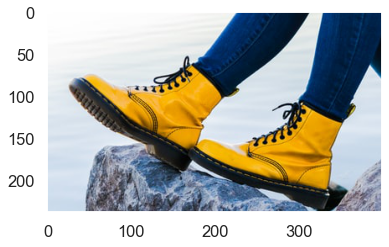

In [6]:
plt.imshow(img)

In [7]:
np.array(img).shape

(239, 400, 3)

In [8]:
#import the shape of each image
height, width=[],[]
for i in range(1,250):
    try:
        img = Image.open('image'+str(i)+'.jpg')
    except:
        pass
    try:
        img = Image.open('image'+str(i)+'.jpeg')
    except:
        pass
    try:
        img = Image.open('image'+str(i)+'.png')
    except:
        pass
    img=np.array(img)
    height.append(img.shape[0])
    width.append(img.shape[1])
    #print('image'+str(i)+'.jpg')
    

In [9]:
np.min(width)

213

In [10]:
np.min(height)

239

In [11]:
def check_images(N_images, print_=False):
    '''Check the values of pixels and RGB in each image'''
    height, width=[],[]
    for i in range(1,N_images+1):
        try:
            img = Image.open('image'+str(i)+'.jpg')
        except:
            pass
        try:
            img = Image.open('image'+str(i)+'.jpeg')
        except:
            pass
        try:
            img = Image.open('image'+str(i)+'.png')
        except:
            pass
        img=np.array(img)
        if len(img.shape)==3:
            if img.shape[2]==3:
                height.append(img.shape[0])
                width.append(img.shape[1])
        if print_:
            print('image'+str(i)+'.jpg')
    return height, width

In [12]:
#Find means of width abd height of images
h, w=check_images(249, print_=False)
#print('Height',np.mean(h))
#print('Width',np.mean(w))
len(h)

246

In [13]:
#Set mean_height and mean_width
mean_height=800
mean_width=800

In [14]:
#REsize with tensorflow, method='nearest neighbors'
img_2=tensorflow.image.resize_with_pad(
    np.array(img), mean_height, mean_width, method='nearest',
    antialias=False
)

In [15]:
np_1=np.stack([np.array(img_2),np.array(img_2)],axis=0)
np_1.shape

(2, 800, 800, 3)

In [16]:
def get_transform_images(N_first_image,N_last_image,print_=False):
    '''Loads images, then pads them
    and turns them to a stack of images'''
    np_0=[]
    for i in range(N_first_image,N_last_image+1):
        try:
            img = Image.open('image'+str(i)+'.jpg')
        except:
            pass
        try:
            img = Image.open('image'+str(i)+'.jpeg')
        except:
            pass
        try:
            img = Image.open('image'+str(i)+'.png')
        except:
            pass
        img_np=np.array(img)
        if len(img_np.shape)==3:
            if img_np.shape[2]==3:
                image_tr=tensorflow.image.resize_with_pad(img_np, mean_height, mean_width, method='nearest',antialias=False)
                np_0.append(np.array(image_tr).copy())
            if print_:
                print('image'+str(i)+'.jpg')
    np_1=np.stack(np_0,axis=0)   
    return np_1

In [17]:
img_boots_train=get_transform_images(1,249)

In [18]:
img_boots_train.shape

(246, 800, 800, 3)

In [19]:
#Playing with tensorflow.resize_with_pad
#img_3 = Image.open('image3.jpeg')
#img_3=np.array(img_3)
#image_tr_3=tensorflow.image.resize_with_pad(img_3, mean_height, mean_width, method='nearest',antialias=False)
#print(np.array(image_tr_3).shape)

In [20]:
len(img_boots_train)

246

In [21]:
#Verifying the shapes of images
#for i,img in enumerate(img_boots_train):
#    print('image'+str(i+1)+' has a shape of ',img.shape)

### Now, we have set the functions to extract images.
**We need to set y_train values and get other images**

In [22]:
#Target objects
targets={'сапоги':0,'сланцы/босоножки':1,'лоферы':2,"сандали":3,"кросовки":4,"футбольные бутсы":5}

In [23]:
y_boots_train=np.array([targets['сапоги'] for _ in range(len(img_boots_train))])

In [24]:
##Now import images for flip flops
os.chdir(r"C:\Users\AlexB\Desktop\Data science\my own first codes\CNN_DeepLearning_image_recognition\shoeTypeClassifierDataset\training\flip_flops")

In [25]:
img_flipflops_train=get_transform_images(1,249)

In [26]:
#show random image
def show_rand_image(dataset):
    plt.imshow(dataset[np.random.randint(1,40)])
    plt.axis('off')

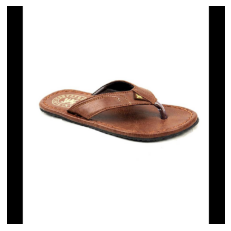

In [27]:
show_rand_image(img_flipflops_train)

In [28]:
y_flipflops_train=np.array([targets['сланцы/босоножки'] for _ in range(len(img_flipflops_train))])

In [29]:
##Now import images for loafer
os.chdir(r"C:\Users\AlexB\Desktop\Data science\my own first codes\CNN_DeepLearning_image_recognition\shoeTypeClassifierDataset\training\loafers")
img_loafers_train=get_transform_images(1,249)
y_loafers_train=np.array([targets['лоферы'] for _ in range(len(img_loafers_train))])

In [30]:
##Npw sandals
os.chdir(r"C:\Users\AlexB\Desktop\Data science\my own first codes\CNN_DeepLearning_image_recognition\shoeTypeClassifierDataset\training\sandals")
img_sandals_train=get_transform_images(1,249)
y_sandals_train=np.array([targets["сандали"] for _ in range(len(img_sandals_train))])

In [31]:
y_boots_train.mean()

0.0

In [32]:
#Now sneakers
os.chdir(r"C:\Users\AlexB\Desktop\Data science\my own first codes\CNN_DeepLearning_image_recognition\shoeTypeClassifierDataset\training\sneakers")
img_sneakers_train=get_transform_images(1,249)
y_sneakers_train=np.array([targets["кросовки"] for _ in range(len(img_sneakers_train))])

In [33]:
y_sneakers_train.mean()

4.0

In [34]:
#Now soccer shoes
os.chdir(r"C:\Users\AlexB\Desktop\Data science\my own first codes\CNN_DeepLearning_image_recognition\shoeTypeClassifierDataset\training\soccer_shoes")
img_soccers_train=get_transform_images(1,249)
y_soccers_train=np.array([targets["футбольные бутсы"] for _ in range(len(img_soccers_train))])

In [35]:
y_soccers_train.mean()

5.0

In [36]:
#target_label y_train
y_train=np.concatenate([y_boots_train,y_flipflops_train,y_loafers_train,y_sandals_train,y_sneakers_train,y_soccers_train])
y_train.shape

(1478,)

In [37]:
#Get the training set
x_train=np.concatenate([img_boots_train,
                        img_flipflops_train,
                        img_loafers_train,img_sandals_train,
                        img_sneakers_train,img_soccers_train],axis=0)

In [38]:
x_train.shape

(1478, 800, 800, 3)

**Now I import the validation set**

In [39]:
#Test set for boots
os.chdir(r'C:\Users\AlexB\Desktop\Data science\my own first codes\CNN_DeepLearning_image_recognition\shoeTypeClassifierDataset\validation\boots')
img_boots_test=get_transform_images(250,299)
y_boots_test=np.array([targets['сапоги'] for _ in range(len(img_boots_test))])

In [40]:
len(y_boots_test)

50

In [41]:
#Flip flop for test set
os.chdir(r'C:\Users\AlexB\Desktop\Data science\my own first codes\CNN_DeepLearning_image_recognition\shoeTypeClassifierDataset\validation\flip_flops')
img_flipflops_test=get_transform_images(250,299)
y_flipflops_test=np.array([targets['сланцы/босоножки'] for _ in range(len(img_flipflops_test))])

In [42]:
#Loafers for test set
os.chdir(r'C:\Users\AlexB\Desktop\Data science\my own first codes\CNN_DeepLearning_image_recognition\shoeTypeClassifierDataset\validation\loafers')
img_loafers_test=get_transform_images(250,299)
y_loafers_test=np.array([targets['лоферы'] for _ in range(len(img_loafers_test))])

In [43]:
#Sandals
os.chdir(r'C:\Users\AlexB\Desktop\Data science\my own first codes\CNN_DeepLearning_image_recognition\shoeTypeClassifierDataset\validation\sandals')
img_sandals_test=get_transform_images(250,299)
y_sandals_test=np.array([targets['сандали'] for _ in range(len(img_sandals_test))])

In [44]:
#Sneakers
os.chdir(r'C:\Users\AlexB\Desktop\Data science\my own first codes\CNN_DeepLearning_image_recognition\shoeTypeClassifierDataset\validation\sneakers')
img_sneakers_test=get_transform_images(250,299)
y_sneakers_test=np.array([targets['кросовки'] for _ in range(len(img_sneakers_test))])

In [45]:
#Soccer shoes
os.chdir(r'C:\Users\AlexB\Desktop\Data science\my own first codes\CNN_DeepLearning_image_recognition\shoeTypeClassifierDataset\validation\soccer_shoes')
img_soccers_test=get_transform_images(250,299)
y_soccers_test=np.array([targets["футбольные бутсы"] for _ in range(len(img_soccers_test))])

In [46]:
y_boots_test.mean()

0.0

In [47]:
#target_label y_test
y_test=np.concatenate([y_boots_test,y_flipflops_test,y_loafers_test,y_sandals_test,y_sneakers_test,y_soccers_test])
y_test.shape

(290,)

In [48]:
#Get the test set
x_test=np.concatenate([img_boots_test,
                        img_flipflops_test,
                        img_loafers_test,img_sandals_test,
                        img_sneakers_test,img_soccers_test],axis=0)
x_test.shape

(290, 800, 800, 3)

### The data is finally imported. I can build the convolutional neural networks now

In [49]:
#Classes
num_classes = len(targets)
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

In [50]:
# let's make everything float and scale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [51]:
# Let's build a CNN using Keras' Sequential capabilities

model = Sequential()


## 5x5 convolution with 2x2 stride and 8 filters
model.add(Conv2D(16, (3, 3), strides = (2,2), padding='valid',
                input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 8 filters
model.add(Conv2D(16, (3, 3), strides = (2,2)))
model.add(Activation('relu'))

## Another 3x3 convolution with 2x2 stride and 8 filters
model.add(Conv2D(16, (3, 3), strides = (3,3)))
model.add(Activation('relu'))

## Another 3x3 convolution with 2x2 stride and 8 filters
model.add(Conv2D(16, (3, 3), strides = (3,3)))
model.add(Activation('relu'))

## 4x4 max pooling reduces
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.6))

## Flatten
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 399, 399, 16)      448       
_________________________________________________________________
activation (Activation)      (None, 399, 399, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 199, 199, 16)      2320      
_________________________________________________________________
activation_1 (Activation)    (None, 199, 199, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 66, 66, 16)        2320      
_________________________________________________________________
activation_2 (Activation)    (None, 66, 66, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 16)        2

In [94]:
#Compile the model
batch_size = 32

# initiate RMSprop optimizer
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.005)

# Let's train the model using Adam
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [95]:
#Fit the model
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/10
47/47 [==============================] - 73s 2s/step - loss: 1.4696 - accuracy: 0.4263 - val_loss: 1.5335 - val_accuracy: 0.4034
Epoch 2/10
47/47 [==============================] - 71s 2s/step - loss: 1.3857 - accuracy: 0.4614 - val_loss: 1.4265 - val_accuracy: 0.4793
Epoch 3/10
47/47 [==============================] - 74s 2s/step - loss: 1.3408 - accuracy: 0.4763 - val_loss: 1.3954 - val_accuracy: 0.4655
Epoch 4/10
47/47 [==============================] - 72s 2s/step - loss: 1.3261 - accuracy: 0.4831 - val_loss: 1.3877 - val_accuracy: 0.4828
Epoch 5/10
47/47 [==============================] - 72s 2s/step - loss: 1.2971 - accuracy: 0.5014 - val_loss: 1.3452 - val_accuracy: 0.5000
Epoch 6/10
47/47 [==============================] - 72s 2s/step - loss: 1.2729 - accuracy: 0.5230 - val_loss: 1.3848 - val_accuracy: 0.4793
Epoch 7/10
47/47 [==============================] - 73s 2s/step - loss: 1.2101 - accuracy: 0.5365 - val_loss: 1.3963 - val_accuracy: 0.4793
Epoch 8/10
47/47 [==

## Prediction performance

In [55]:
def show_predicted_images(model,num_images_in_row=2,num_images_in_col=2):
    num_images=num_images_in_col*num_images_in_row
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle('Objects recognised by deep learning')
    im_numbers=np.random.randint(0,x_test.shape[0], num_images)
    class_names=list(targets.keys())
    for i in range(num_images):
        ax = fig.add_subplot(num_images_in_row, num_images_in_col, i+1)
        ax.imshow(x_test[im_numbers[i]])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set(title='Predicted: '+str(class_names[model.predict_classes(np.expand_dims(x_test[im_numbers[i]],axis=0))[0]])+
              '\nReality:'+str(class_names[np.argmax(y_test[im_numbers[i]])]))

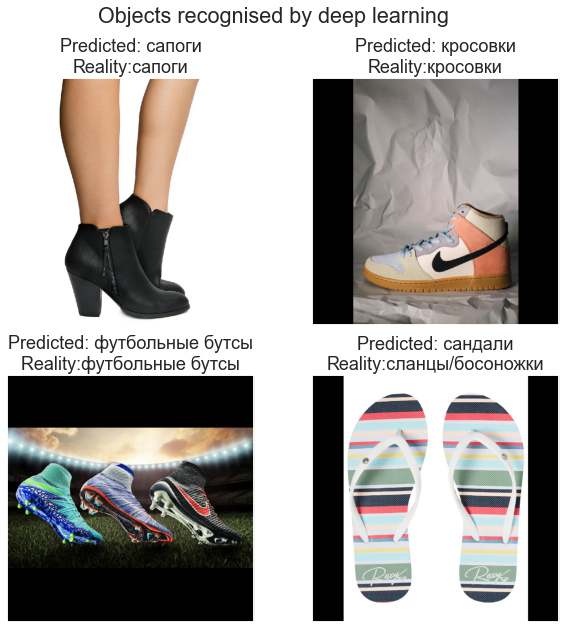

In [104]:
show_predicted_images(model,2,2)
plt.savefig('Model4_performance.jpg')

## Collect and display the model performances

In [61]:
#model_performances={'Model':[],'Loss':[],'Val accuracy':[]}

In [62]:
def add_metrics_to_model_performance(model,model_name):
    loss, accuracy=model.evaluate(x_test,y_test)
    model_performances['Model'].append(model_name)
    model_performances['Loss'].append(loss)
    model_performances['Val accuracy'].append(accuracy)
    model_perf_df=pd.DataFrame(model_performances)
    return model_perf_df

In [105]:
performance_df=add_metrics_to_model_performance(model, 'model_4')

10/10 [==============================] - 5s 449ms/step - loss: 1.3505 - accuracy: 0.5034


In [106]:
performance_df

,Model,Loss,Val accuracy
0,model_1,1.660400,0.275862
1,model_2,1.500324,0.437931
2,model_3,1.437232,0.434483
3,model_4,1.350493,0.503448


In [73]:
#os.chdir(r'C:\Users\AlexB\Desktop\Data science\my own first codes\CNN_DeepLearning_image_recognition')
performance_df.to_csv('Performance_CNN.csv')

### Saving the latest model

In [108]:
# serialize model to JSON
model_json = model.to_json()
with open("model_4.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_4.h5")
print("Saved model to disk")

Saved model to disk


### Loading the model

In [74]:
#Loading a model to JSON file
from tensorflow.keras.models import model_from_json
with open('model_4.json', 'r') as json_file:
    loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_4.h5")
print("Loaded model from disk")
# initiate Adam optimizer
opt_2 = tensorflow.keras.optimizers.Adam(learning_rate=0.005)
loaded_model.compile(loss='categorical_crossentropy',
              optimizer=opt_2,
              metrics=['accuracy'])
print('Loaded model is compiled')

Loaded model from disk
Loaded model is compiled


In [ ]:
loaded_model.evaluate(x_test,y_test)

**Pickle the train test datasets**

In [52]:
#pickle the train-test variables
import pickle as pkl
fileObject = open('x_train_shoes.pkl', 'wb')
pkl.dump(x_train, fileObject)
fileObject.close()

In [60]:
def pickle_dump(variable,filename):
    with open(filename, 'wb') as f:
        pkl.dump(variable, f)

In [68]:
#Saving a pickle variable
pickle_dump(y_test,'y_test_shoes.pkl')

In [58]:
def pickle_load(filename):
    with open(filename, 'rb') as f:
        var_loaded = pkl.load(f)
    return var_loaded

In [70]:
#Loading a pickle variable
y_test_loaded=pickle_load('y_test_shoes.pkl')
y_test_loaded.shape

(290, 6)

In [75]:
#Checking loaded model on loaded variable
loaded_model.evaluate(x_test_loaded,y_test_loaded)

10/10 [==============================] - 5s 450ms/step - loss: 1.3505 - accuracy: 0.5034


[1.3504931926727295, 0.5034482479095459]